# Team 5 - Predicting Heart-Related Diseases

### Problem statement:   
The idea of the project is to explore the factors related to heart disease and to create a model that can predict whether or not heart disease exists based on these factors.

#### Facts about heart diseases:
Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1

#### Source of the data: 
The heart disease data set was found in: https://archive.ics.uci.edu/ml/datasets/heart+Disease  
Includes 4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach. The total number of instances are 920.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.

**Attributes description** 

1. #3 (age)
2. #4 (sex): (1 = male; 0 = female)
3. #9 (cp): chest pain type(1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic)
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol): serum cholestoral in mg/dl
6. #16 (fbs): (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. #19 (restecg): resting electrocardiographic results (0=normal, 1=having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2= showing probable or definite left ventricular hypertrophy  by Estes' criteria
8. #32 (thalach): maximum heart rate achieved
9. #38 (exang): exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak): ST depression induced by exercise relative to rest
11. #41 (slope): the slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)
12. #44 (ca): number of major vessels (0-3) colored by flourosopy
13. #51 (thal): A blood disorder called thalassemia = 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (target) (the predicted attribute): diagnosis of heart disease = presence (values 1,2,3,4), absence (value
     0).  


In [337]:
#LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [338]:
# These options help us to inspect our data more easily.
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

In [339]:
# These commands load and read the 4 different dataframes: Cleveland, Hungary, Switzerland, and the VA Long Beach

na_vals = ['NA','Missing','?']   #convert to NaN value

df_cleveland = pd.read_csv("processed.cleveland.csv", header = None, na_values=na_vals) #Each data set convert the values of na_vals to NaN values
df_hungarian = pd.read_csv("processed.hungarian.csv", header = None, na_values=na_vals)
df_va = pd.read_csv("processed.va.csv", header = None, na_values=na_vals)
df_switzerland = pd.read_csv("processed.switzerland.csv",header = None, na_values=na_vals)


In [340]:
#Set the name of the 14 Attributes

column_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [341]:
#----------------------------CLEVELAND------------------------------------
#Add the names of the attributes to the dataset
df_cleveland.columns = column_names

In [342]:
#Add a column to name the region of the data collected to identify the origin of each data when mergin the datasets
df_cleveland['region']='Cleveland'

In [343]:
#Data visualization of the first 5 rows
df_cleveland.head(5)

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target     region  
0    3.0  0.0   6.0       0  Cleveland  
1    2.0  3.0   3.0       2  Cleveland  
2    2.0  2.0   7.0       1  Cleveland  
3    3.0  0.0   3.0       0  Cleveland  
4    1.0  0.0   3.0       0  Cleveland

In [344]:
#Number of columns and rows of the dataframe
df_cleveland.shape

(303, 15)

In [345]:
#----------------------------HUNGARY------------------------------------
df_hungarian.columns = column_names
df_hungarian['region']='Hungary'

df_hungarian.head(5)


age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   slope  ca  thal  target   region  
0    NaN NaN   NaN       0  Hungary  
1    NaN NaN   NaN       0  Hungary  
2    NaN NaN   NaN       0  Hungary  
3    NaN NaN   6.0       0  Hungary  
4    NaN NaN   NaN       0  Hungary

In [346]:
df_hungarian.shape

(294, 15)

In [347]:
#----------------------------LONG BEACH------------------------------------
df_va.columns = column_names
df_va['region']='Long Beach'
df_va.head(5)

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   4     140.0  260.0  0.0        1    112.0    1.0      3.0   
1   44    1   4     130.0  209.0  0.0        1    127.0    0.0      0.0   
2   60    1   4     132.0  218.0  0.0        1    140.0    1.0      1.5   
3   55    1   4     142.0  228.0  0.0        1    149.0    1.0      2.5   
4   66    1   3     110.0  213.0  1.0        2     99.0    1.0      1.3   

   slope  ca  thal  target      region  
0    2.0 NaN   NaN       2  Long Beach  
1    NaN NaN   NaN       0  Long Beach  
2    3.0 NaN   NaN       2  Long Beach  
3    1.0 NaN   NaN       1  Long Beach  
4    2.0 NaN   NaN       0  Long Beach

In [348]:
df_va.shape

(200, 15)

In [349]:
#----------------------------SWITZERLAND------------------------------------
df_switzerland.columns = column_names
df_switzerland['region']='Switzerland'
df_switzerland.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   32    1   1      95.0     0  NaN      0.0    127.0    0.0      0.7    1.0   
1   34    1   4     115.0     0  NaN      NaN    154.0    0.0      0.2    1.0   
2   35    1   4       NaN     0  NaN      0.0    130.0    1.0      NaN    NaN   
3   36    1   4     110.0     0  NaN      0.0    125.0    1.0      1.0    2.0   
4   38    0   4     105.0     0  NaN      0.0    166.0    0.0      2.8    1.0   

   ca  thal  target       region  
0 NaN   NaN       1  Switzerland  
1 NaN   NaN       1  Switzerland  
2 NaN   7.0       3  Switzerland  
3 NaN   6.0       1  Switzerland  
4 NaN   NaN       2  Switzerland

In [350]:
df_switzerland.shape

(123, 15)

In [351]:
#Concatenate the 4 datasets

df_conc = pd.concat([df_cleveland, df_hungarian, df_va, df_switzerland], axis = 0)

# 1. DATA PREPARATION
###  Merged database: conc

In [352]:
df_conc

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
118  70.0  1.0  4.0     115.0    0.0  0.0      1.0     92.0    1.0      0.0   
119  70.0  1.0  4.0     140.0    0.0  1.0      0.0    157.0    1.0      2.0   
120  72.0  1.0  3.0     160.0    0.0  NaN      2.0    114.0    0.0      1.6   
121  73.0  0.0  3.0     160.0    0.0  0.0      1.0    121.0    0.0      0.0   
122  74.0  1.0  2.0     145.0    0.0  NaN      1.0    123.0    0.0      1.3   

     slope   ca  thal  target       region  
0      3.0  0.0   6.0       0    Cleveland  
1      2.0  3.0   3.0       2    Cleveland  
2      2.0  2.0   7.0       1    Cleveland  
3      3.0  0.0   3.0       0    Cleveland  
4      1.0  0.0   3.0       0    Cleveland  
..     ...  ...   ...     ...          ...  
118    2.0  NaN   7.0       1  Switzerland  
119    2.0  NaN   7.0       3  Switzerland  
120    2.0  2.0   NaN       0  Switzerland  
121    1.0  NaN   3.0       1  Switzerland  
122    1.0  NaN   NaN       1  Switzerland  

[920 rows x 15 columns]

In [353]:
df_conc.shape

(920, 15)

In [354]:
#Data type of the merged dataframe
df_conc.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
region       object
dtype: object

In [355]:
#Fix Data type
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
df_conc[lst] = df_conc[lst].astype(object)

In [356]:
df_conc.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
region       object
dtype: object

In [357]:
#----------------------------------DATA CLEANING----------------------------------------------------
#Checking for outliers in Attribute: Age 

df_conc['age'].unique() 

array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
       71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
       74., 76., 28., 30., 31., 32., 33., 36., 72., 75., 73.])

In [358]:
#Checking for outliers in Attribute: Sex (1 = male; 0 = female)
df_conc['sex'].unique() 

array([1.0, 0.0], dtype=object)

In [359]:
#Checking for outliers in Attribute: cp: chest pain type(1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic)
df_conc['cp'].unique() 

array([1.0, 4.0, 3.0, 2.0], dtype=object)

In [360]:
#Checking for outliers in Attribute: trstbps =resting blood pressure (in mm Hg on admission to the hospital)

df_conc['trestbps'].unique() 

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190.,  nan, 113.,  92.,
       116.,   0.,  96., 127.,  95.,  80., 185.])

In [361]:
#Zero is outliers then replace it as NaN
df_conc['trestbps'].replace(0, 'NaN' ,inplace=True)

In [362]:
df_conc['trestbps'].unique()

array([145.0, 160.0, 120.0, 130.0, 140.0, 172.0, 150.0, 110.0, 132.0,
       117.0, 135.0, 112.0, 105.0, 124.0, 125.0, 142.0, 128.0, 170.0,
       155.0, 104.0, 180.0, 138.0, 108.0, 134.0, 122.0, 115.0, 118.0,
       100.0, 200.0, 94.0, 165.0, 102.0, 152.0, 101.0, 126.0, 174.0,
       148.0, 178.0, 158.0, 192.0, 129.0, 144.0, 123.0, 136.0, 146.0,
       106.0, 156.0, 154.0, 114.0, 164.0, 98.0, 190.0, nan, 113.0, 92.0,
       116.0, 'NaN', 96.0, 127.0, 95.0, 80.0, 185.0], dtype=object)

In [363]:
#Checking for outliers in Attribute:chol = serum cholestoral in mg/dl
df_conc['chol'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [364]:
df_conc['chol'].replace(0, 'NaN' ,inplace=True)

In [365]:
df_conc['chol'].unique()

array([233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268.0, 354.0, 254.0,
       203.0, 192.0, 294.0, 256.0, 263.0, 199.0, 168.0, 239.0, 275.0,
       266.0, 211.0, 283.0, 284.0, 224.0, 206.0, 219.0, 340.0, 226.0,
       247.0, 167.0, 230.0, 335.0, 234.0, 177.0, 276.0, 353.0, 243.0,
       225.0, 302.0, 212.0, 330.0, 175.0, 417.0, 197.0, 198.0, 290.0,
       253.0, 172.0, 273.0, 213.0, 305.0, 216.0, 304.0, 188.0, 282.0,
       185.0, 232.0, 326.0, 231.0, 269.0, 267.0, 248.0, 360.0, 258.0,
       308.0, 245.0, 270.0, 208.0, 264.0, 321.0, 274.0, 325.0, 235.0,
       257.0, 164.0, 141.0, 252.0, 255.0, 201.0, 222.0, 260.0, 182.0,
       303.0, 265.0, 309.0, 307.0, 249.0, 186.0, 341.0, 183.0, 407.0,
       217.0, 288.0, 220.0, 209.0, 227.0, 261.0, 174.0, 281.0, 221.0,
       205.0, 240.0, 289.0, 318.0, 298.0, 564.0, 246.0, 322.0, 299.0,
       300.0, 293.0, 277.0, 214.0, 207.0, 223.0, 160.0, 394.0, 184.0,
       315.0, 409.0, 244.0, 195.0, 196.0, 126.0, 313.0, 259.0, 200.0,
       262.0, 215.0,

In [366]:
#Checking for outliers in Attribute:fbs= (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
df_conc['fbs'].unique()

array([1.0, 0.0, nan], dtype=object)

In [367]:
#Convert to float
lst2=['trestbps', 'chol']
df_conc[lst2] = df_conc[lst2].astype('float')

In [368]:
df_conc.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
region       object
dtype: object

In [369]:
#Checking for outliers in Attribute: restecg: resting electrocardiographic results (0=normal, 1=having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2= showing probable or definite left ventricular hypertrophy  by Estes' criteria

df_conc['restecg'].unique()

array([2.0, 0.0, 1.0, nan], dtype=object)

In [370]:
#Checking for outliers in Attribute:  thalach: maximum heart rate achieved

df_conc['thalach'].unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 115., 149., 145., 146., 175.,
       186., 185., 159., 130., 190., 136.,  97., 127., 154., 133., 126.,
       202., 103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105.,
       194., 195., 106., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.,  98., 176., 135., 110.,  nan, 100.,  87., 102.,
        92.,  91.,  82., 119.,  94.,  86.,  84.,  80., 107.,  69.,  73.,
        93., 104.,  60.,  83.,  63.,  70.,  77.,  72.,  78.,  67.])

In [371]:
#Checking for outliers in Attribute: exang: exercise induced angina (1 = yes; 0 = no)

df_conc['exang'].unique()

array([0.0, 1.0, nan], dtype=object)

In [372]:
#Checking for outliers in Attribute: oldpeak = ST depression induced by exercise relative to rest

df_conc['oldpeak'].unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  0.6,  3.1,  0.4,  1.3,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  4. ,  5.6,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. , -0.5,  nan,  1.7,
       -1.1, -1.5, -0.1, -2.6, -0.7, -2. , -1. , -0.8, -0.9,  3.7])

In [373]:
#Checking for outliers in Attribute: slope: the slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)
df_conc['slope'].unique()

array([3.0, 2.0, 1.0, nan], dtype=object)

In [374]:
#Checking for outliers in Attribute: ca: number of major vessels (0-3) colored by flourosopy

df_conc['ca'].unique()

array([0.0, 3.0, 2.0, 1.0, nan], dtype=object)

In [375]:
#Checking for outliers in Attribute: thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

df_conc['thal'].unique()

array([6.0, 3.0, 7.0, nan], dtype=object)

In [376]:
#Checking for outliers in Attribute: target (the predicted attribute) = diagnosis of heart disease = presence (values 1,2,3,4), absence (value 0).  
df_conc['target'].unique()

array([0, 2, 1, 3, 4], dtype=object)

In [377]:
#For better understanding the presence values will be reduced only to 1
df_conc.loc[df_conc.target > 1, 'target'] = 1
df_conc['target'].unique()

array([0, 1], dtype=object)

In [378]:
#Total of null values
print(pd.isnull(df_conc).sum())


age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
region        0
dtype: int64


In [379]:
#Real values
print(pd.notnull(df_conc).sum())

age         920
sex         920
cp          920
trestbps    860
chol        718
fbs         830
restecg     918
thalach     865
exang       865
oldpeak     858
slope       611
ca          309
thal        434
target      920
region      920
dtype: int64


In [380]:
#Look for duplicates
df_conc.duplicated().sum()

2

In [381]:
df_conc.loc[df_conc.duplicated(keep=False), :]

age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak  \
101  49.0  0.0  2.0     110.0    NaN  0.0     0.0    160.0   0.0      0.0   
102  49.0  0.0  2.0     110.0    NaN  0.0     0.0    160.0   0.0      0.0   
139  58.0  1.0  3.0     150.0  219.0  0.0     1.0    118.0   1.0      0.0   
187  58.0  1.0  3.0     150.0  219.0  0.0     1.0    118.0   1.0      0.0   

    slope   ca thal target      region  
101   NaN  NaN  NaN      0     Hungary  
102   NaN  NaN  NaN      0     Hungary  
139   NaN  NaN  NaN      1  Long Beach  
187   NaN  NaN  NaN      1  Long Beach

In [382]:
#Erase duplicates
df_conc.drop_duplicates(inplace=True)
df_conc.duplicated().sum()

0

###  Data exploration

In [383]:
#Categorical variables------------------------------------------------------------------------------------------
#Sex

df_conc.sex.value_counts(dropna=False)

1.0    725
0.0    193
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Gender', ylabel='Total'>

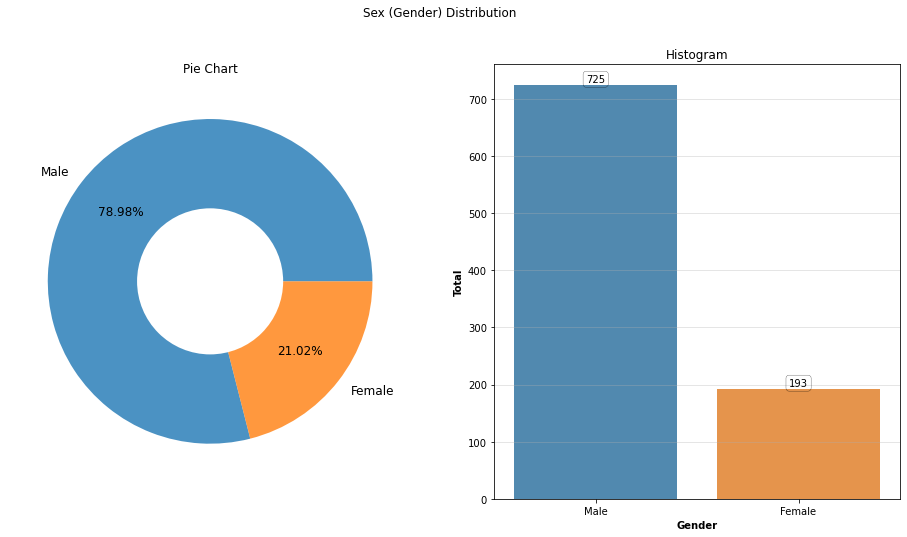

In [384]:
#Categorical variables------------------------------------------------------------------------------------------
#Sex

# --- Labels, Order ---
labels=['Male', 'Female']
order=df_conc['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df_conc['sex'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='sex', data=df_conc, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Total', fontweight='bold')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


In [385]:
#Chest pain
df_conc.cp.value_counts(dropna=False)

4.0    496
3.0    203
2.0    173
1.0     46
Name: cp, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Chest pain', ylabel='Total'>

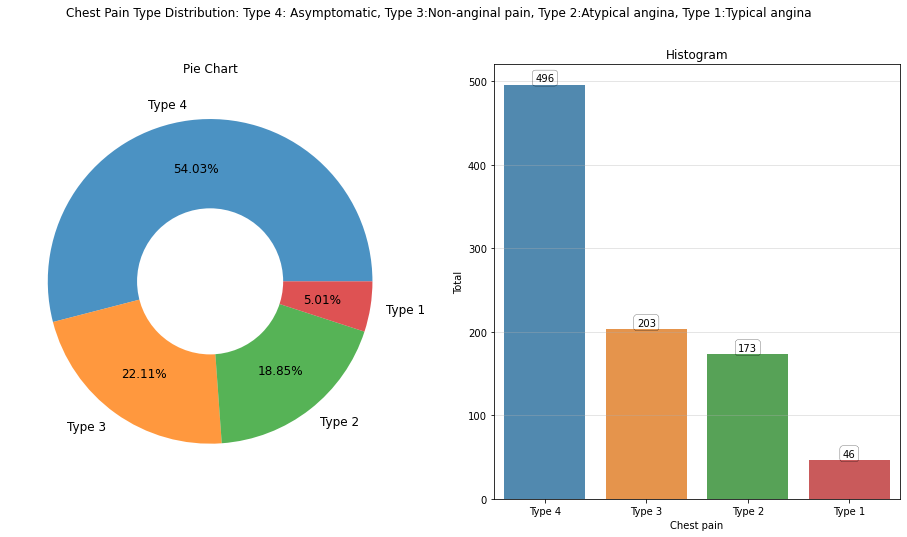

In [386]:
#Chest pain

# --- Labels, Order ---
labels=['Type 4', 'Type 3', 'Type 2', 'Type 1']
order=df_conc['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution: Type 4: Asymptomatic, Type 3:Non-anginal pain, Type 2:Atypical angina, Type 1:Typical angina')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df_conc['cp'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='cp', data=df_conc, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Chest pain')
plt.ylabel('Total')
plt.xticks([0, 1,2,3], labels)
plt.grid(axis='y', alpha=0.4)
countplt


In [387]:
#Fasting blood sugar
df_conc.fbs.value_counts(dropna=False)

0.0    690
1.0    138
NaN     90
Name: fbs, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Fasting Blood Sugar', ylabel='Total'>

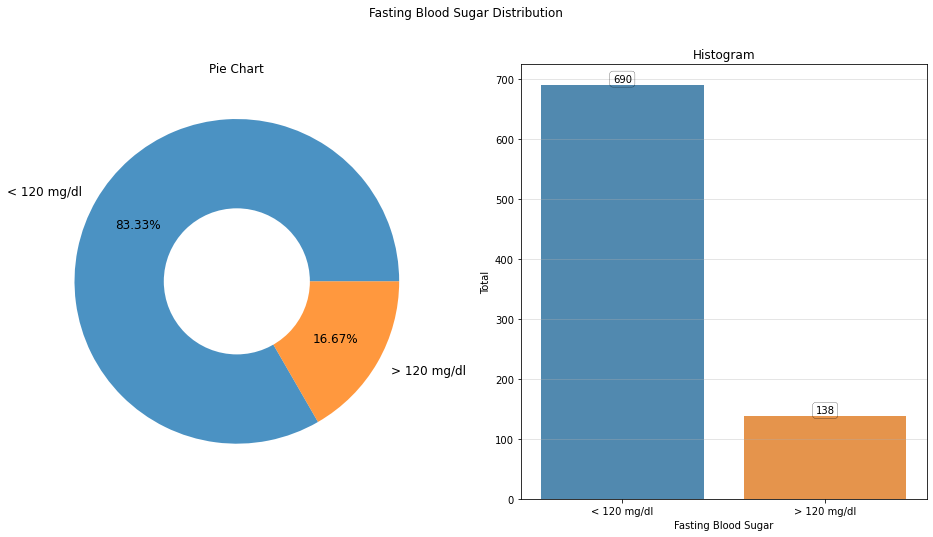

In [388]:
# --- Labels, Order ---
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df_conc['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df_conc['fbs'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='fbs', data=df_conc, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

In [389]:
#Resting Electrocardiographic results
df_conc.restecg.value_counts(dropna=False)

0.0    550
2.0    188
1.0    178
NaN      2
Name: restecg, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Resting ECG', ylabel='Total'>

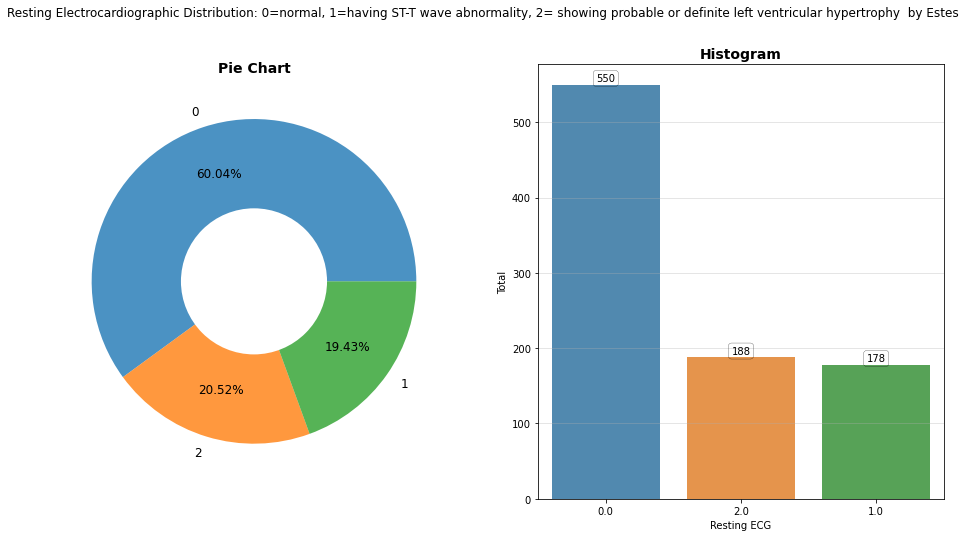

In [390]:
# --- Labels, Order ---


labels=['0', '2', '1']
order=df_conc['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution: 0=normal, 1=having ST-T wave abnormality, 2= showing probable or definite left ventricular hypertrophy  by Estes')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df_conc['restecg'].value_counts(), labels=labels, 
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='restecg', data=df_conc, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting ECG')
plt.ylabel('Total')
plt.grid(axis='y', alpha=0.4)
countplt


In [391]:
#Exercise induced angina
df_conc.exang.value_counts(dropna=False)

0.0    527
1.0    336
NaN     55
Name: exang, dtype: int64

In [392]:
#Slope
df_conc.slope.value_counts(dropna=False)

2.0    345
NaN    307
1.0    203
3.0     63
Name: slope, dtype: int64

In [393]:
#Number of major vessels
df_conc.ca.value_counts(dropna=False)

NaN    609
0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

In [394]:
#Thal
df_conc.thal.value_counts(dropna=False)

NaN    484
3.0    196
7.0    192
6.0     46
Name: thal, dtype: int64

In [395]:
#Diagnosis of heart disease
df_conc.target.value_counts(dropna=False)

1    508
0    410
Name: target, dtype: int64

<AxesSubplot:title={'center':'Histogram'}, xlabel='Heart Disease', ylabel='Total'>

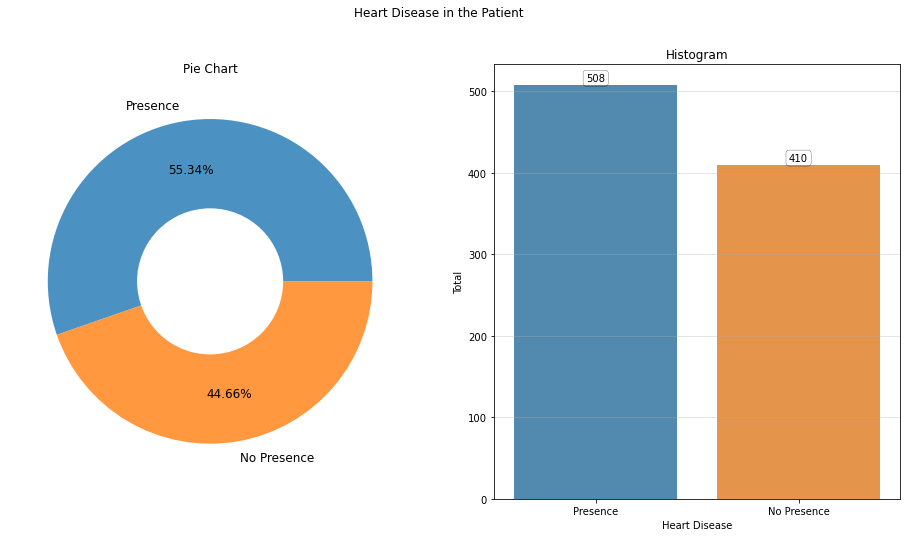

In [396]:
# --- Labels, Order ---
labels=['Presence', 'No Presence']
order=df_conc['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Heart Disease in the Patient')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df_conc['target'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='target', data=df_conc, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Heart Disease')
plt.ylabel('Total')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

In [397]:
df_conc.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
region       object
dtype: object

In [398]:
#Summary descriptive statistics of numerical variables
df_conc.describe(include=[np.number])

age    trestbps        chol     thalach     oldpeak
count  918.000000  858.000000  717.000000  863.000000  856.000000
mean    53.510893  132.291375  246.871688  137.542294    0.880841
std      9.432617   18.532294   58.558668   25.936524    1.091673
min     28.000000   80.000000   85.000000   60.000000   -2.600000
25%     47.000000  120.000000  210.000000  120.000000    0.000000
50%     54.000000  130.000000  240.000000  140.000000    0.500000
75%     60.000000  140.000000  277.000000  157.000000    1.500000
max     77.000000  200.000000  603.000000  202.000000    6.200000

# 2. EXPLORATORY DATA ANALYSIS (EDA)
In total there are 14 Attibutes, 5 of them are numerical (age,trestbps, chol,thalach,oldpeak) and the rest are categorical.

###   visualisation of numerical and categorical variables, check pearson correlation 

# 2.1. Correlation matrix
A correlation matrix shows the correlation between different variables in a matrix setting. 

In [399]:
corr_matrix = df_conc.corr()
print(corr_matrix)

               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.252263  0.083711 -0.365261  0.258584
trestbps  0.252263  1.000000  0.089538 -0.100592  0.171698
chol      0.083711  0.089538  1.000000 -0.047886  0.046401
thalach  -0.365261 -0.100592 -0.047886  1.000000 -0.151308
oldpeak   0.258584  0.171698  0.046401 -0.151308  1.000000


# 2.1.1. Heatmaps (Correlation Map)
Heatmap coloring of the matrix, where one color indicates a positive correlation, another indicates a negative correlation, and the shade indicates the strength of correlation, can make these matrices easier for the reader to understand.

Text(0.5, 1.0, 'Resting blood pressure, maximum heart rate achieved, and "oldpeak" have moderate relationship with age.')

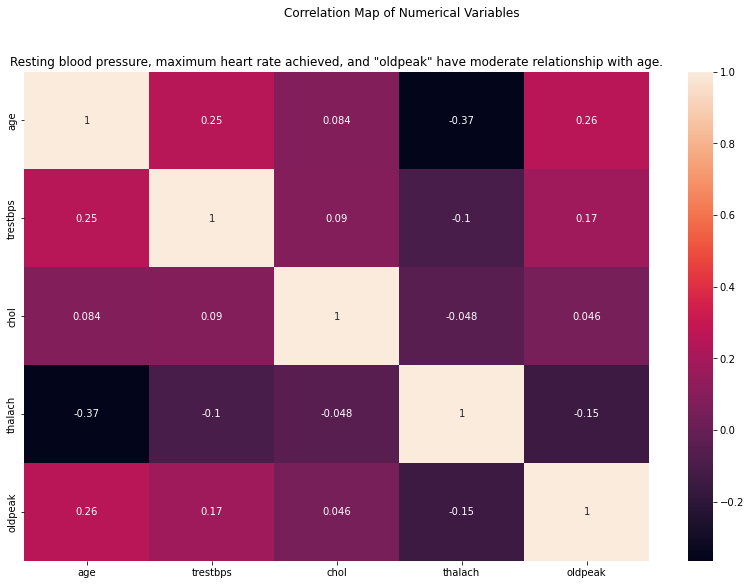

In [400]:
#Heat map
plt.figure(figsize=(14, 9))
sns.heatmap(df_conc.corr(), annot=True)
plt.suptitle('Correlation Map of Numerical Variables')
plt.title('Resting blood pressure, maximum heart rate achieved, and "oldpeak" have moderate relationship with age.')
#plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# 2.2. Univariate analysis 
In this section we'll investigate all the features (including the target) in detail.

# 2.2.1. Categorical variables
### 2.2.1.1. Sex


In [401]:
total_genders_count=len(df_conc.sex)
male_count=len(df_conc[df_conc['sex']==1])
female_count=len(df_conc[df_conc['sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 918
Male Count    : 725
Female Count  : 193


In [402]:
#Percentage ratios
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 78.98%
Female State: 21.02%


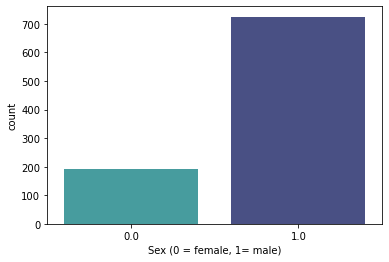

In [403]:
sns.countplot(x='sex', data=df_conc, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

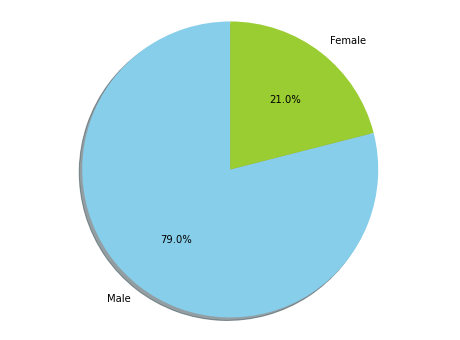

In [404]:
male =len(df_conc[df_conc['sex'] == 1])
female = len(df_conc[df_conc['sex']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

### 2.2.1.2. Chest pain type

In [405]:
total_cp_count=len(df_conc.sex)
cp_count_1=len(df_conc[df_conc['cp']==1.0])
cp_count_2=len(df_conc[df_conc['cp']==2.0])
cp_count_3=len(df_conc[df_conc['cp']==3.0])
cp_count_4=len(df_conc[df_conc['cp']==4.0])
print('Total Chest pain type :',total_cp_count)
print('Chest pain type 1 :', cp_count_1)
print('Chest pain type 2 :', cp_count_2)
print('Chest pain type 3 :', cp_count_3)
print('Chest pain type 4 :', cp_count_4)

Total Chest pain type : 918
Chest pain type 1 : 46
Chest pain type 2 : 173
Chest pain type 3 : 203
Chest pain type 4 : 496


In [406]:
#Percentage ratios
print("Chest pain type 1: {:.2f}%".format((cp_count_1 / (total_cp_count)*100)))
print("Chest pain type 2: {:.2f}%".format((cp_count_2 / (total_cp_count)*100)))
print("Chest pain type 3: {:.2f}%".format((cp_count_3 / (total_cp_count)*100)))
print("Chest pain type 4: {:.2f}%".format((cp_count_4 / (total_cp_count)*100)))

Chest pain type 1: 5.01%
Chest pain type 2: 18.85%
Chest pain type 3: 22.11%
Chest pain type 4: 54.03%


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


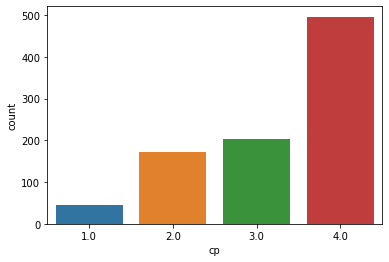

In [407]:
sns.countplot(df_conc.cp)
plt.show()

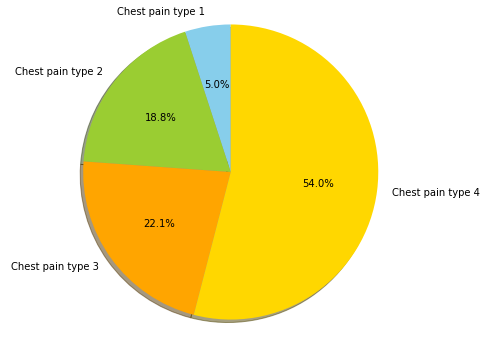

In [408]:
type_1 =len(df_conc[df_conc['cp'] == 1])
type_2 = len(df_conc[df_conc['cp']== 2])
type_3 = len(df_conc[df_conc['cp']== 3])
type_4 = len(df_conc[df_conc['cp']== 4])



plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest pain type 1','Chest pain type 2', 'Chest pain type 3', 'Chest pain type 4'
sizes = [type_1,type_2,type_3,type_4]
colors = ['skyblue', 'yellowgreen', 'orange', 'gold']
explode = (0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

### 2.2.1.3. Fasting blood sugar > 120 mg/dl 

In [409]:
total_fbs_count=len(df_conc.fbs)
fbs_true_count=len(df_conc[df_conc['fbs']==1])
fbs_false_count=len(df_conc[df_conc['fbs']==0])
print('Total fasting blood sugar :',total_genders_count)
print('Fasting blood sugar > 120 mg/dl is true    :',fbs_true_count)
print('Fasting blood sugar > 120 mg/dl is false   :',fbs_false_count)

Total fasting blood sugar : 918
Fasting blood sugar > 120 mg/dl is true    : 138
Fasting blood sugar > 120 mg/dl is false   : 690


In [410]:
#Percentage ratios
print("Fasting blood sugar > 120 mg/dl is true: {:.2f}%".format((fbs_true_count / (total_fbs_count)*100)))
print("Fasting blood sugar > 120 mg/dl is false: {:.2f}%".format((fbs_false_count / (total_fbs_count)*100)))

Fasting blood sugar > 120 mg/dl is true: 15.03%
Fasting blood sugar > 120 mg/dl is false: 75.16%


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


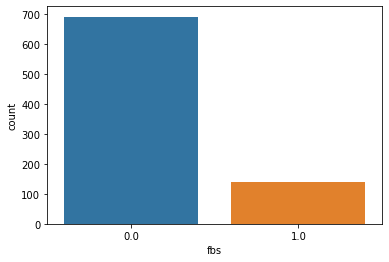

In [411]:
sns.countplot(df_conc.fbs)
plt.show()

### 2.2.1.4. Resting electrocardiographic results

In [412]:
total_restecg_count=len(df_conc.restecg)
normal_restecg_count=len(df_conc[df_conc['restecg']==0])
abnormal_restecg_count=len(df_conc[df_conc['restecg']==1])
left_ventricular_restecg_count=len(df_conc[df_conc['restecg']==2])
print('Total resting electrocardiographic results:',total_restecg_count)
print('Resting electrocardiographic results normal:',normal_restecg_count)
print('Resting electrocardiographic results having ST-T wave abnormality:', abnormal_restecg_count)
print('Resting electrocardiographic results showing probable or definite left ventricular hypertrophy by Estes criteria:',left_ventricular_restecg_count)

Total resting electrocardiographic results: 918
Resting electrocardiographic results normal: 550
Resting electrocardiographic results having ST-T wave abnormality: 178
Resting electrocardiographic results showing probable or definite left ventricular hypertrophy by Estes criteria: 188


In [413]:
#Percentage ratios
print("Resting electrocardiographic results normal: {:.2f}%".format((normal_restecg_count / (total_restecg_count)*100)))
print("Resting electrocardiographic results having ST-T wave abnormality: {:.2f}%".format((abnormal_restecg_count / (total_restecg_count)*100)))
print("Resting electrocardiographic results showing probable or definite left ventricular hypertrophy by Estes criteria: {:.2f}%".format((left_ventricular_restecg_count / (total_restecg_count)*100)))

Resting electrocardiographic results normal: 59.91%
Resting electrocardiographic results having ST-T wave abnormality: 19.39%
Resting electrocardiographic results showing probable or definite left ventricular hypertrophy by Estes criteria: 20.48%


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


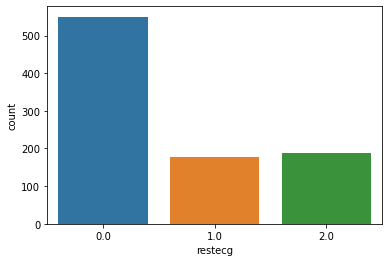

In [414]:
sns.countplot(df_conc.restecg)
plt.show()

### 2.2.1.5. Exercise induced angina

In [415]:
total_exang_count=len(df_conc.exang)
exang_count=len(df_conc[df_conc['exang']==1])
no_exang_count=len(df_conc[df_conc['exang']==0])
print('Total exercise induced angina count:',total_exang_count)
print('Exercise induced angina count   :',exang_count)
print('No exercise induced angina count:',no_exang_count)

Total exercise induced angina count: 918
Exercise induced angina count   : 336
No exercise induced angina count: 527


In [416]:
#Percentage ratios
print("Exercise induced angina count: {:.2f}%".format((exang_count / (total_exang_count)*100)))
print("No exercise induced angina count: {:.2f}%".format((no_exang_count / (total_exang_count)*100)))

Exercise induced angina count: 36.60%
No exercise induced angina count: 57.41%


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


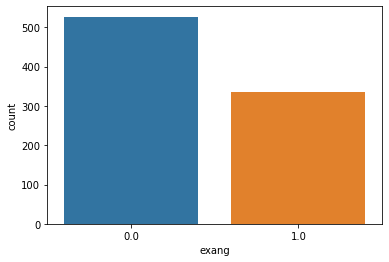

In [417]:
sns.countplot(df_conc.exang)
plt.show()

### 2.2.1.6. The slope of the peak exercise ST segment

In [418]:
total_count=len(df_conc.slope)
upsloping_count=len(df_conc[df_conc['slope']==1])
flat_count=len(df_conc[df_conc['slope']==2])
downsloping_count=len(df_conc[df_conc['slope']==3])
print('Total count:',total_count)
print('Upsloping:',upsloping_count)
print('Flat:', flat_count)
print('Downsloping:',downsloping_count)

Total count: 918
Upsloping: 203
Flat: 345
Downsloping: 63


In [419]:
#Percentage ratios
print("Upsloping: {:.2f}%".format((upsloping_count / (total_count)*100)))
print("Flat: {:.2f}%".format((flat_count / (total_count)*100)))
print("Downsloping: {:.2f}%".format((downsloping_count / (total_count)*100)))

Upsloping: 22.11%
Flat: 37.58%
Downsloping: 6.86%


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


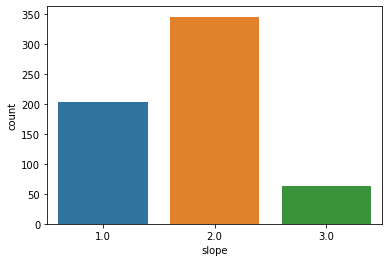

In [420]:
sns.countplot(df_conc.slope)
plt.show()

### 2.2.1.7. Number of major vessels

In [421]:
total_number_vessels=len(df_conc.ca)
number_vessels_1=len(df_conc[df_conc['ca']==0])
number_vessels_2=len(df_conc[df_conc['ca']==1])
number_vessels_3=len(df_conc[df_conc['ca']==2])
number_vessels_4=len(df_conc[df_conc['ca']==3])
print('Total number of vessels:',total_number_vessels)
print('Number of vessels 1:',number_vessels_1)
print('Number of vessels 2:', number_vessels_2)
print('Number of vessels 3:',number_vessels_3)
print('Number of vessels 4:',number_vessels_4)

Total number of vessels: 918
Number of vessels 1: 181
Number of vessels 2: 67
Number of vessels 3: 41
Number of vessels 4: 20


In [422]:
#Percentage ratios
print("Number of vessels 1: {:.2f}%".format((number_vessels_1 / (total_number_vessels)*100)))
print("Number of vessels 2: {:.2f}%".format((number_vessels_2 / (total_number_vessels)*100)))
print("Number of vessels 3: {:.2f}%".format((number_vessels_3 / (total_number_vessels)*100)))
print("Number of vessels 4: {:.2f}%".format((number_vessels_4 / (total_number_vessels)*100)))

Number of vessels 1: 19.72%
Number of vessels 2: 7.30%
Number of vessels 3: 4.47%
Number of vessels 4: 2.18%


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


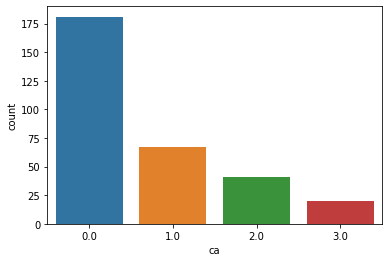

In [423]:
sns.countplot(df_conc.ca)
plt.show()

### 2.2.1.8. Thalassemia 

In [424]:
total_thalassemia=len(df_conc.thal)
normal_thalassemia=len(df_conc[df_conc['thal']==3])
fixed_defect_thalassemia=len(df_conc[df_conc['thal']==6])
reversable_defect_thalassemia=len(df_conc[df_conc['thal']==7])
print('Total thalassemia:',total_number_vessels)
print('Normal thalassemia:',normal_thalassemia)
print('Fixed defect thalassemia:', fixed_defect_thalassemia)
print('Reversable defect thalassemia:',reversable_defect_thalassemia)

Total thalassemia: 918
Normal thalassemia: 196
Fixed defect thalassemia: 46
Reversable defect thalassemia: 192


In [425]:
#Percentage ratios
print("Normal thalassemia: {:.2f}%".format((normal_thalassemia / (total_thalassemia)*100)))
print("Fixed defect thalassemia: {:.2f}%".format((fixed_defect_thalassemia / (total_thalassemia)*100)))
print("Reversable defect thalassemia: {:.2f}%".format((reversable_defect_thalassemia / (total_thalassemia)*100)))

Normal thalassemia: 21.35%
Fixed defect thalassemia: 5.01%
Reversable defect thalassemia: 20.92%


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


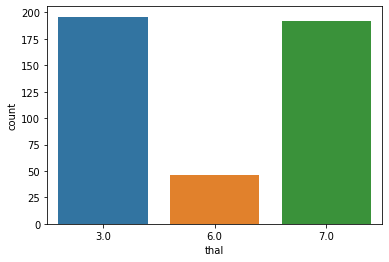

In [426]:
sns.countplot(df_conc.thal)
plt.show()

### 2.2.1.9. Target

In [427]:
total_target=len(df_conc.target)
presence_target=len(df_conc[df_conc['target']==1])
absence_target=len(df_conc[df_conc['target']==0])
print('Total target :',total_target)
print('Presence target   :',presence_target)
print('Absence target  :',absence_target)

Total target : 918
Presence target   : 508
Absence target  : 410


In [428]:
#Percentage ratios
print("Presence target: {:.2f}%".format((presence_target / (total_target)*100)))
print("Absence target: {:.2f}%".format((absence_target / (total_target)*100)))

Presence target: 55.34%
Absence target: 44.66%


In [429]:
countNoDisease = len(df_conc[df_conc.target == 0])
countHaveDisease = len(df_conc[df_conc.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df_conc.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df_conc.target))*100)))

Percentage of Patients Haven't Heart Disease: 44.66%
Percentage of Patients Have Heart Disease: 55.34%


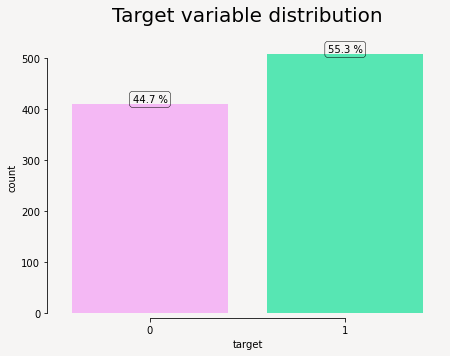

In [430]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df_conc))
ax = sns.countplot(x=df_conc['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# 2.2.2. Numerical variables
### 2.2.2.1. Age

In [431]:
#firstly find min and max ages
minAge=min(df_conc.age)
maxAge=max(df_conc.age)
meanAge=df_conc.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 28.0
Max Age : 77.0
Mean Age : 53.510893246187365


In [432]:
young_ages=df_conc[(df_conc.age>=29)&(df_conc.age<40)]
middle_ages=df_conc[(df_conc.age>=40)&(df_conc.age<55)]
elderly_ages=df_conc[(df_conc.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 79
Middle Ages : 391
Elderly Ages : 406


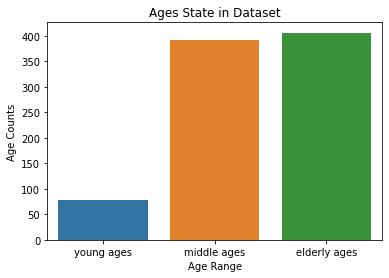

In [433]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

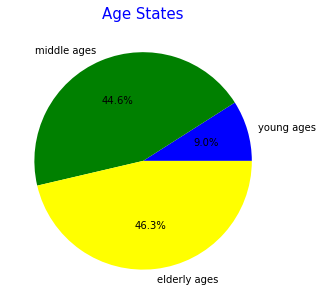

In [434]:
colors = ['blue','green','yellow']
explode = [0,0,0.0]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


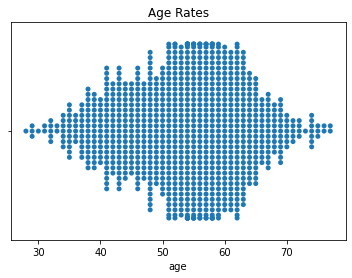

In [435]:
sns.swarmplot(x=df_conc.age)
plt.title('Age Rates')
plt.show()

<AxesSubplot:xlabel='age'>

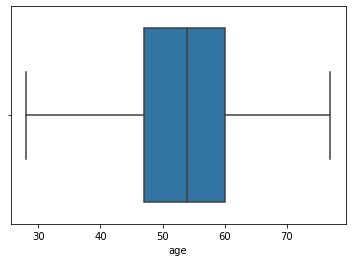

In [436]:
sns.boxplot(x=df_conc["age"])

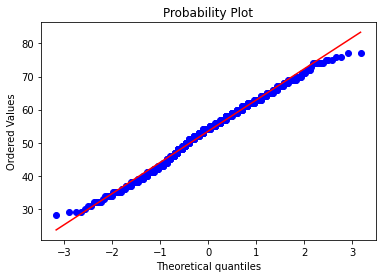

In [437]:
#Get also the QQ-plot
from scipy import stats
fig = plt.figure()
res = stats.probplot(df_conc['age'], plot=plt)
plt.show()

### 2.2.2.2. Resting blood pressure

In [438]:
#firstly find min and max resting blood pressure
minTrestbps=min(df_conc.trestbps)
maxTrestbps=max(df_conc.trestbps)
meanTrestbps=df_conc.trestbps.mean()
print('Min Resting Blood Pressure :',minTrestbps)
print('Max Resting Blood Pressure :',maxTrestbps)
print('Mean Resting Blood Pressure :',meanTrestbps)

Min Resting Blood Pressure : 80.0
Max Resting Blood Pressure : 200.0
Mean Resting Blood Pressure : 132.2913752913753


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


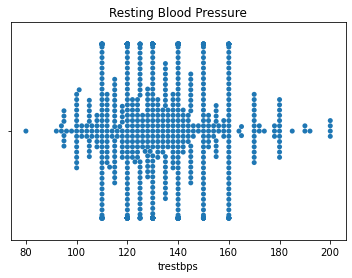

In [439]:
sns.swarmplot(x=df_conc.trestbps)
plt.title('Resting Blood Pressure')
plt.show()

C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


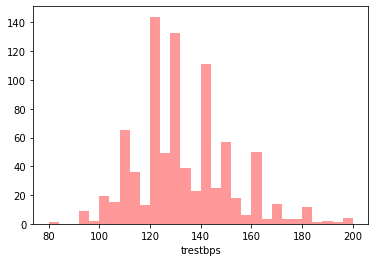

In [440]:
sns.distplot(df_conc['trestbps'],kde=False,bins=30,color='red')
plt.show()

<AxesSubplot:xlabel='trestbps'>

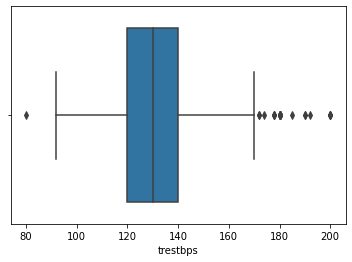

In [441]:
sns.boxplot(x=df_conc["trestbps"])

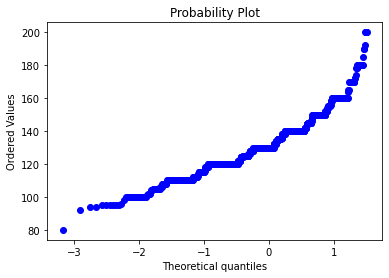

In [442]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_conc['trestbps'], plot=plt)
plt.show()

### 2.2.2.3. Cholesterol serum

In [443]:
#firstly find min and max cholesterol serum
minChol=min(df_conc.chol)
maxChol=max(df_conc.chol)
meanChol=df_conc.chol.mean()
print('Min Cholesterol Serum :',minChol)
print('Max Cholesterol Serum :',maxChol)
print('Mean Cholesterol Serum :',meanChol)

Min Cholesterol Serum : 85.0
Max Cholesterol Serum : 603.0
Mean Cholesterol Serum : 246.87168758716876


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


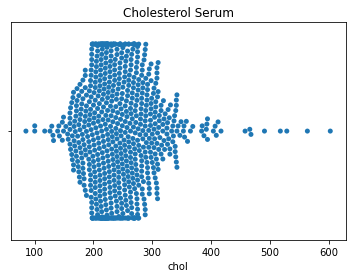

In [444]:
sns.swarmplot(x=df_conc.chol)
plt.title('Cholesterol Serum')
plt.show()

C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


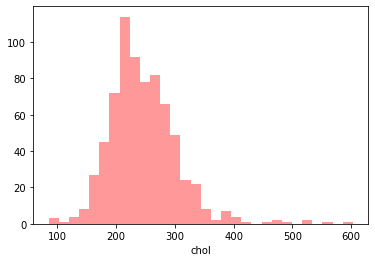

In [445]:
sns.distplot(df_conc['chol'],kde=False,bins=30,color='red')
plt.show()

<AxesSubplot:xlabel='chol'>

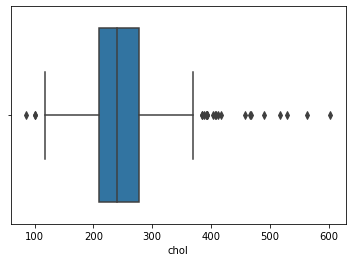

In [446]:
sns.boxplot(x=df_conc["chol"])

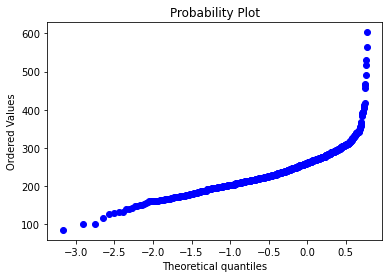

In [447]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_conc['chol'], plot=plt)
plt.show()

### 2.2.2.4. Maximum heart rate achieved

In [448]:
#firstly find min and max maximum heart rate achieved
minThalach=min(df_conc.thalach)
maxThalach=max(df_conc.thalach)
meanThalach=df_conc.thalach.mean()
print('Min Maximum Heart Rate Achieved:',minThalach)
print('Max Maximum Heart Rate Achieved:',maxThalach)
print('Mean Maximum Heart Rate Achieved:',meanThalach)

Min Maximum Heart Rate Achieved: 60.0
Max Maximum Heart Rate Achieved: 202.0
Mean Maximum Heart Rate Achieved: 137.5422943221321


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


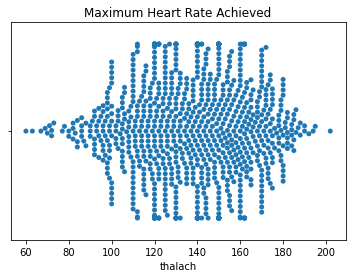

In [449]:
sns.swarmplot(x=df_conc.thalach)
plt.title('Maximum Heart Rate Achieved')
plt.show()

C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


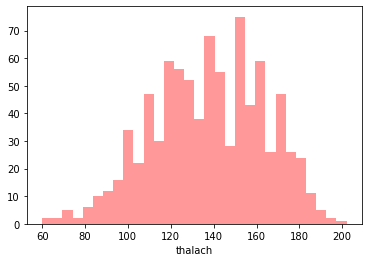

In [450]:
sns.distplot(df_conc['thalach'],kde=False,bins=30,color='red')
plt.show()

<AxesSubplot:xlabel='thalach'>

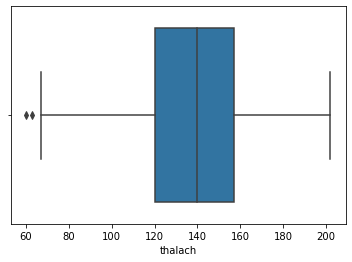

In [451]:
sns.boxplot(x=df_conc["thalach"])

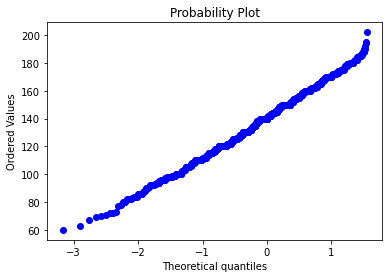

In [452]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_conc['thalach'], plot=plt)
plt.show()

### 2.2.2.5. ST depression induced by exercise relative to rest

In [453]:
#firstly find min and max ST depression induced by exercise relative to rest
minOldpeak=min(df_conc.oldpeak)
maxOldpeak=max(df_conc.oldpeak)
meanOldpeak=df_conc.oldpeak.mean()
print('Min ST depression induced by exercise relative to rest :',minOldpeak)
print('Max ST depression induced by exercise relative to rest :',maxOldpeak)
print('Mean ST depression induced by exercise relative to rest:',meanOldpeak)

Min ST depression induced by exercise relative to rest : -2.6
Max ST depression induced by exercise relative to rest : 6.2
Mean ST depression induced by exercise relative to rest: 0.8808411214953272


C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


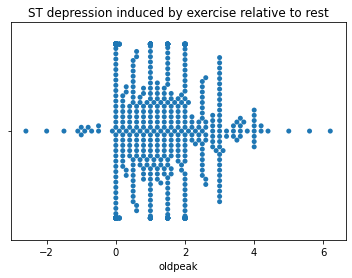

In [454]:
sns.swarmplot(x=df_conc.oldpeak)
plt.title('ST depression induced by exercise relative to rest')
plt.show()

C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


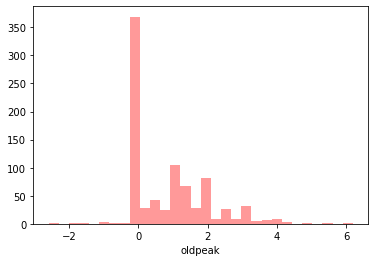

In [455]:
sns.distplot(df_conc['oldpeak'],kde=False,bins=30,color='red')
plt.show()

<AxesSubplot:xlabel='oldpeak'>

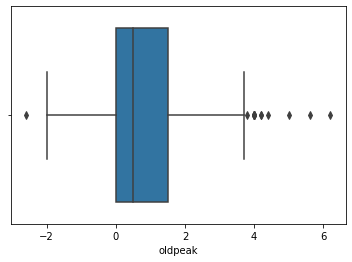

In [456]:
sns.boxplot(x=df_conc["oldpeak"])

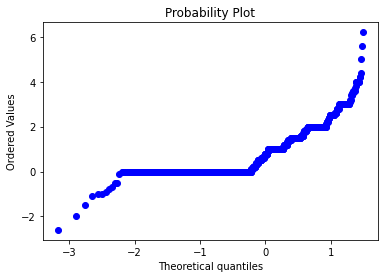

In [457]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_conc['oldpeak'], plot=plt)
plt.show()

# 2.3. Bivariate analysis
### 2.3.1 Sex - Target relationship

In [458]:
pd.crosstab(df_conc.target, df_conc.sex)

sex     0.0  1.0
target          
0       143  267
1        50  458

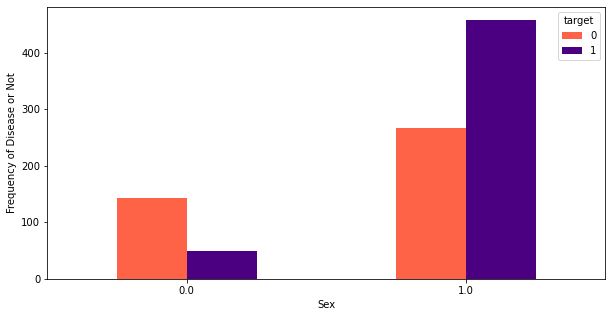

In [459]:
pd.crosstab(df_conc.sex,df_conc.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Sex')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Chest Pain Type - Target relationship

In [460]:
pd.crosstab(df_conc.target, df_conc.cp)

cp      1.0  2.0  3.0  4.0
target                    
0        26  149  131  104
1        20   24   72  392

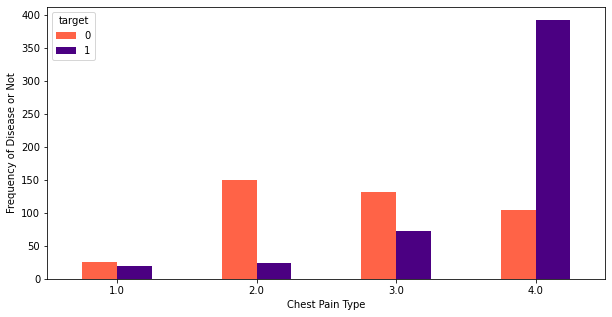

In [461]:
pd.crosstab(df_conc.cp,df_conc.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Fasting Blood Sugar - Target relationship

In [462]:
pd.crosstab(df_conc.target, df_conc.fbs)

fbs     0.0  1.0
target          
0       352   44
1       338   94

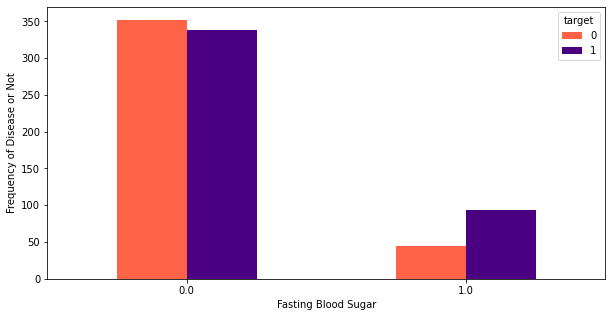

In [463]:
pd.crosstab(df_conc.fbs,df_conc.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Fasting Blood Sugar')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Resting Electrocardiographic Results - Target relationship

In [464]:
pd.crosstab(df_conc.target, df_conc.restecg)

restecg  0.0  1.0  2.0
target                
0        267   61   82
1        283  117  106

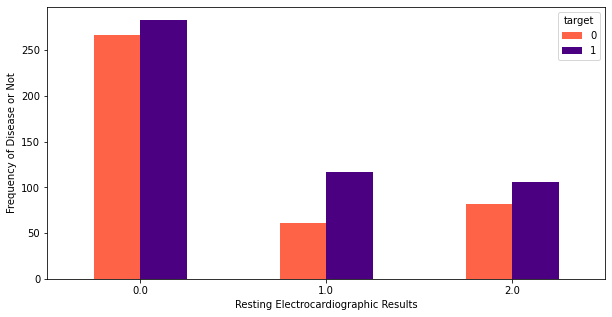

In [465]:
pd.crosstab(df_conc.restecg,df_conc.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Resting Electrocardiographic Results')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Exercise Induced Angina - Target relationship

In [466]:
pd.crosstab(df_conc.target, df_conc.exang)

exang   0.0  1.0
target          
0       335   55
1       192  281

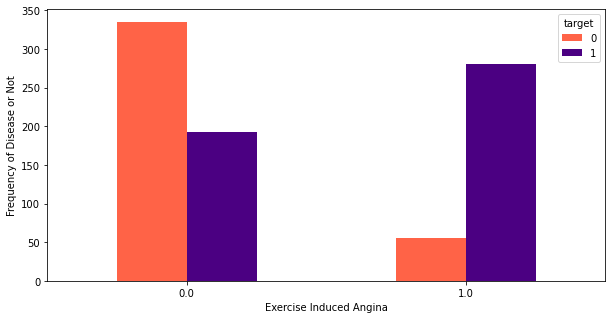

In [467]:
pd.crosstab(df_conc.exang,df_conc.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Exercise Induced Angina')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Slope of the peak exercise ST segment - Target relationship

In [468]:
pd.crosstab(df_conc.target, df_conc.slope)

slope   1.0  2.0  3.0
target               
0       125   79   14
1        78  266   49

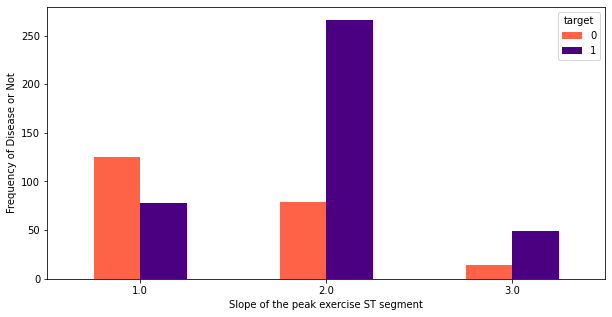

In [469]:
pd.crosstab(df_conc.slope,df_conc.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Slope of the peak exercise ST segment')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Number of major vessels - Target relationship

In [470]:
pd.crosstab(df_conc.target, df_conc.ca)

ca      0.0  1.0  2.0  3.0
target                    
0       133   21    8    3
1        48   46   33   17

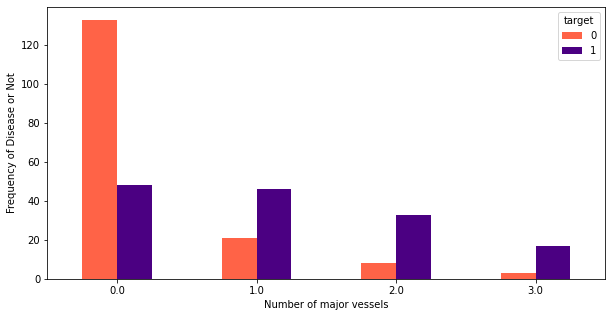

In [471]:
pd.crosstab(df_conc.ca,df_conc.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Number of major vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Thalassemia - Target relationship 

In [472]:
pd.crosstab(df_conc.target, df_conc.thal)

thal    3.0  6.0  7.0
target               
0       138   11   38
1        58   35  154

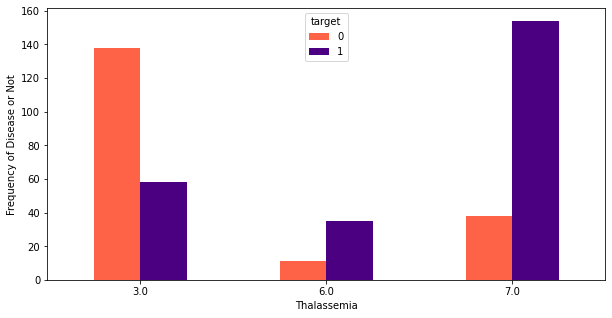

In [473]:
pd.crosstab(df_conc.thal,df_conc.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Thalassemia')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Age - Resting blood pressure - Target relationship 

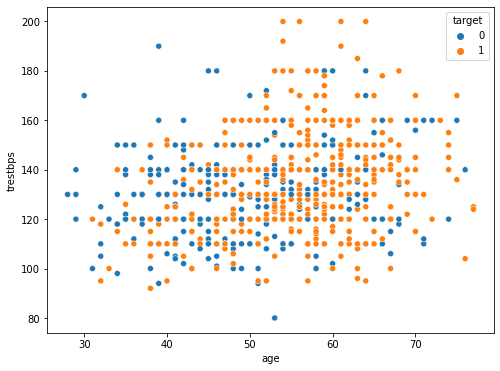

In [474]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='trestbps',data=df_conc,hue='target')
plt.show()

### Age -  Serum cholestoral - Target relationship

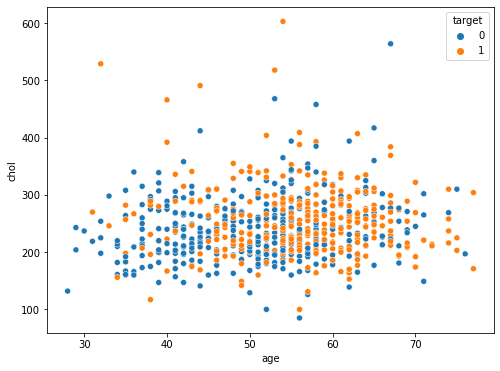

In [475]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='chol',data=df_conc,hue='target')
plt.show()

### Age - Maximum heart rate achieved  - Target relationship

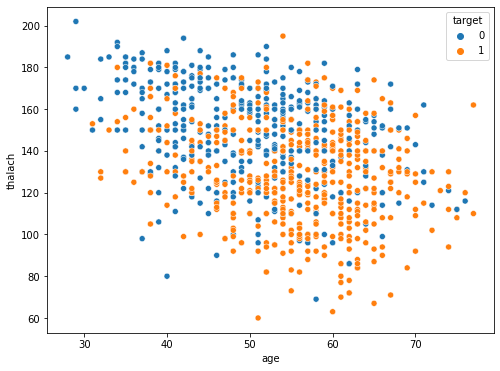

In [476]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='thalach',data=df_conc,hue='target')
plt.show()

### Age - Target relationship

C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


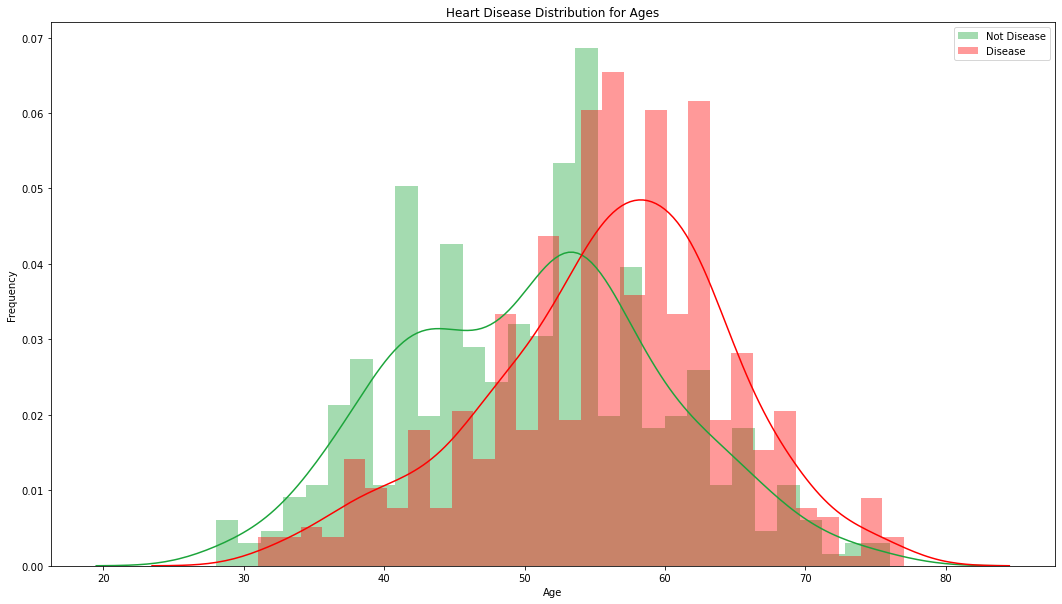

In [477]:
plt.figure(figsize=(18, 10))
sns.distplot(df_conc.age[df_conc['target'] == 0], bins=30, color='#1CA53B', label='Not Disease')
sns.distplot(df_conc.age[df_conc['target'] == 1], bins=30, color='red', label='Disease')
plt.legend()
plt.title('Heart Disease Distribution for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

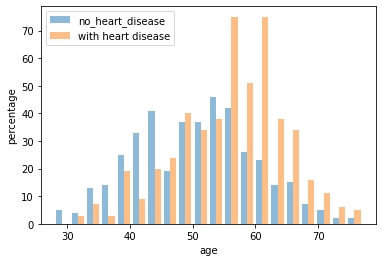

In [478]:
plt.hist([df_conc[df_conc.target==0].age, df_conc[df_conc.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

C:\Users\Yasmin Lozano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation of age with target')

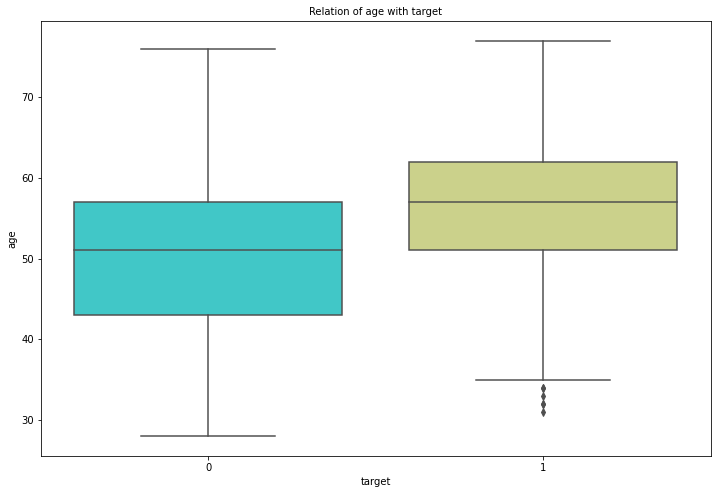

In [479]:
plt.figure(figsize=(12,8))
sns.boxplot(df_conc['target'], df_conc['age'], palette = 'rainbow')
plt.title('Relation of age with target', fontsize = 10)

# 2.4. Pearson correlation

In [487]:
#Convert all to FLOAT!!!
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target','age','trestbps','chol','thalach','oldpeak']
df_conc[lst] = df_conc[lst].astype(float)


In [488]:
#Saving the attributes as columns from modified file
x_age = df_conc.age
x_sex = df_conc.sex
x_cp = df_conc.cp
x_trestbps = df_conc.trestbps
x_chol = df_conc.chol
x_fbs = df_conc.fbs
x_restecg = df_conc.restecg
x_thalach = df_conc.thalach
x_exang = df_conc.exang
x_oldpeak = df_conc.oldpeak
x_slope = df_conc.slope
x_ca = df_conc.ca
x_thal = df_conc.thal
y = df_conc.target
#correlation value of each of the attributes to presence of heart disease
c_age = x_age.corr(y)
c_sex = x_sex.corr(y)
c_cp = x_cp.corr(y)
c_trestbps = x_trestbps.corr(y)
c_chol = x_chol.corr(y)
c_fbs = x_fbs.corr(y)
c_restecg = x_restecg.corr(y)
c_thalach = x_thalach.corr(y)
c_exang = x_exang.corr(y)
c_oldpeak = x_oldpeak.corr(y)
c_slope = x_slope.corr(y)
c_ca = x_ca.corr(y)
c_thal = x_thal.corr(y)
corr_table = {'Attribute':['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],
              'Pearson r-value':[c_age,c_sex,c_cp,c_trestbps,c_chol,c_fbs,c_restecg,c_thalach,c_exang,c_oldpeak,c_slope,c_ca,c_thal]}
df2 = pd.DataFrame(corr_table)
df2.sort_values(by=['Pearson r-value'])

Attribute  Pearson r-value
7    thalach        -0.393371
6    restecg         0.062574
3   trestbps         0.114705
4       chol         0.119123
5        fbs         0.142725
0        age         0.282039
1        sex         0.305445
10     slope         0.337086
9    oldpeak         0.386106
11        ca         0.455599
8      exang         0.462422
2         cp         0.471354
12      thal         0.498521

#  3. Data pre-procesing
### 3.1. One hot encoding
Since some of the categorical data (cp, restecg, slope, ca, and thal,region) has values larger than 1 and this may affect the model, will use one hot encoding techinique to transform them into binary categorical variables (1 and 0) by adding columns.

In [489]:
# Creating Dummy Variables for cp, restecg, slope, ca, thal and target
cp = pd.get_dummies(df_conc['cp'], prefix='cp')
restecg = pd.get_dummies(df_conc['restecg'], prefix='restecg')
slope = pd.get_dummies(df_conc['slope'], prefix='slope')
ca = pd.get_dummies(df_conc['ca'], prefix='ca')
thal = pd.get_dummies(df_conc['thal'], prefix='thal')
region = pd.get_dummies(df_conc['region'], prefix='region')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df_conc, cp, restecg, slope, ca, thal,region]
df_conc = pd.concat(frames, axis = 1)

In [490]:
df_conc.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target     region  cp_1.0  cp_2.0  cp_3.0  cp_4.0  \
0    3.0  0.0   6.0     0.0  Cleveland       1       0       0       0   
1    2.0  3.0   3.0     1.0  Cleveland       0       0       0       1   
2    2.0  2.0   7.0     1.0  Cleveland       0       0       0       1   
3    3.0  0.0   3.0     0.0  Cleveland       0       0       1       0   
4    1.0  0.0   3.0     0.0  Cleveland       0       1       0       0   

   restecg_0.0  restecg_1.0  restecg_2.0  slope_1.0  slope_2.0  slope_3.0  \
0            0            0            1          0          0          1   
1            0            0            1          0          1          0   
2            0            0            1          0          1          0   
3            1            0            0          0          0          1   
4            0            0            1          1          0          0   

   ca_0.0  ca_1.0  ca_2.0  ca_3.0  thal_3.0  thal_6.0  thal_7.0  \
0       1       0       0       0         0         1         0   
1       0       0       0       1         1         0         0   
2       0       0       1       0         0         0         1   
3       1       0       0       0         1         0         0   
4       1       0       0       0         1         0         0   

   region_Cleveland  region_Hungary  region_Long Beach  region_Switzerland  
0                 1               0                  0                   0  
1                 1               0                  0                   0  
2                 1               0                  0                   0  
3                 1               0                  0                   0  
4                 1               0                  0                   0

In [491]:
#As we have already converted the variables to binary, so we do not need the others - ERASE OLD VARIABLES (cp, restecg, slope, ca, and thal,region)

df_conc = df_conc.drop(columns = ['cp', 'thal', 'slope', 'region', 'restecg','ca'])

df_conc.head()

age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  target  cp_1.0  \
0  63.0  1.0     145.0  233.0  1.0    150.0    0.0      2.3     0.0       1   
1  67.0  1.0     160.0  286.0  0.0    108.0    1.0      1.5     1.0       0   
2  67.0  1.0     120.0  229.0  0.0    129.0    1.0      2.6     1.0       0   
3  37.0  1.0     130.0  250.0  0.0    187.0    0.0      3.5     0.0       0   
4  41.0  0.0     130.0  204.0  0.0    172.0    0.0      1.4     0.0       0   

   cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  restecg_2.0  slope_1.0  \
0       0       0       0            0            0            1          0   
1       0       0       1            0            0            1          0   
2       0       0       1            0            0            1          0   
3       0       1       0            1            0            0          0   
4       1       0       0            0            0            1          1   

   slope_2.0  slope_3.0  ca_0.0  ca_1.0  ca_2.0  ca_3.0  thal_3.0  thal_6.0  \
0          0          1       1       0       0       0         0         1   
1          1          0       0       0       0       1         1         0   
2          1          0       0       0       1       0         0         0   
3          0          1       1       0       0       0         1         0   
4          0          0       1       0       0       0         1         0   

   thal_7.0  region_Cleveland  region_Hungary  region_Long Beach  \
0         0                 1               0                  0   
1         0                 1               0                  0   
2         1                 1               0                  0   
3         0                 1               0                  0   
4         0                 1               0                  0   

   region_Switzerland  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [492]:
#KEEP columns name
all_name_columns = list(df_conc.columns)
all_name_columns

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'target',
 'cp_1.0',
 'cp_2.0',
 'cp_3.0',
 'cp_4.0',
 'restecg_0.0',
 'restecg_1.0',
 'restecg_2.0',
 'slope_1.0',
 'slope_2.0',
 'slope_3.0',
 'ca_0.0',
 'ca_1.0',
 'ca_2.0',
 'ca_3.0',
 'thal_3.0',
 'thal_6.0',
 'thal_7.0',
 'region_Cleveland',
 'region_Hungary',
 'region_Long Beach',
 'region_Switzerland']

###  3.2. Normalization of numerical data
Since the numerical variables show large numbers we will normalize the data (values from zero to one)

In [493]:
df_conc = MinMaxScaler().fit_transform(df_conc)

In [494]:
df_conc = pd.DataFrame(df_conc)

In [495]:
df_conc.head()

0    1         2         3    4         5    6         7    8    9   \
0  0.714286  1.0  0.541667  0.285714  1.0  0.633803  0.0  0.556818  0.0  1.0   
1  0.795918  1.0  0.666667  0.388031  0.0  0.338028  1.0  0.465909  1.0  0.0   
2  0.795918  1.0  0.333333  0.277992  0.0  0.485915  1.0  0.590909  1.0  0.0   
3  0.183673  1.0  0.416667  0.318533  0.0  0.894366  0.0  0.693182  0.0  0.0   
4  0.265306  0.0  0.416667  0.229730  0.0  0.788732  0.0  0.454545  0.0  0.0   

    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
1  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   

    25   26   27   28   29  
0  0.0  1.0  0.0  0.0  0.0  
1  0.0  1.0  0.0  0.0  0.0  
2  1.0  1.0  0.0  0.0  0.0  
3  0.0  1.0  0.0  0.0  0.0  
4  0.0  1.0  0.0  0.0  0.0

In [496]:
df_conc.columns = all_name_columns
df_conc.head()

age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  target  \
0  0.714286  1.0  0.541667  0.285714  1.0  0.633803    0.0  0.556818     0.0   
1  0.795918  1.0  0.666667  0.388031  0.0  0.338028    1.0  0.465909     1.0   
2  0.795918  1.0  0.333333  0.277992  0.0  0.485915    1.0  0.590909     1.0   
3  0.183673  1.0  0.416667  0.318533  0.0  0.894366    0.0  0.693182     0.0   
4  0.265306  0.0  0.416667  0.229730  0.0  0.788732    0.0  0.454545     0.0   

   cp_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  restecg_2.0  \
0     1.0     0.0     0.0     0.0          0.0          0.0          1.0   
1     0.0     0.0     0.0     1.0          0.0          0.0          1.0   
2     0.0     0.0     0.0     1.0          0.0          0.0          1.0   
3     0.0     0.0     1.0     0.0          1.0          0.0          0.0   
4     0.0     1.0     0.0     0.0          0.0          0.0          1.0   

   slope_1.0  slope_2.0  slope_3.0  ca_0.0  ca_1.0  ca_2.0  ca_3.0  thal_3.0  \
0        0.0        0.0        1.0     1.0     0.0     0.0     0.0       0.0   
1        0.0        1.0        0.0     0.0     0.0     0.0     1.0       1.0   
2        0.0        1.0        0.0     0.0     0.0     1.0     0.0       0.0   
3        0.0        0.0        1.0     1.0     0.0     0.0     0.0       1.0   
4        1.0        0.0        0.0     1.0     0.0     0.0     0.0       1.0   

   thal_6.0  thal_7.0  region_Cleveland  region_Hungary  region_Long Beach  \
0       1.0       0.0               1.0             0.0                0.0   
1       0.0       0.0               1.0             0.0                0.0   
2       0.0       1.0               1.0             0.0                0.0   
3       0.0       0.0               1.0             0.0                0.0   
4       0.0       0.0               1.0             0.0                0.0   

   region_Switzerland  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [497]:
#Generates a csv file with the final dataset
df_conc.to_csv('dataframe_cleaned_heart_14.csv')

# 4. DATA MODELLING


###  Random Forest classifier, k-Nearest Neighbors classification, Decision tree classifier, Logistic Regression, Support vector machine algorithm, Naive Bayes algorithm, Confusion Matrix, Model comparison

In [498]:
#To proceed to the analys is necessary drop the NaN values
df_new = df_conc[np.isfinite(df_conc).all(1)]


# 4.1. k-Nearest Neighbours classification
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

In [499]:
#Libraries
from sklearn.neighbors import KNeighborsClassifier #sklearn = ML
from sklearn.model_selection import train_test_split

In [500]:
df_new

age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  \
0    0.714286  1.0  0.541667  0.285714  1.0  0.633803    0.0  0.556818   
1    0.795918  1.0  0.666667  0.388031  0.0  0.338028    1.0  0.465909   
2    0.795918  1.0  0.333333  0.277992  0.0  0.485915    1.0  0.590909   
3    0.183673  1.0  0.416667  0.318533  0.0  0.894366    0.0  0.693182   
4    0.265306  0.0  0.416667  0.229730  0.0  0.788732    0.0  0.454545   
..        ...  ...       ...       ...  ...       ...    ...       ...   
788  0.693878  1.0  0.650000  0.164093  0.0  0.549296    1.0  0.295455   
789  0.367347  1.0  0.450000  0.434363  0.0  0.464789    0.0  0.295455   
790  0.530612  0.0  0.391667  0.478764  1.0  0.661972    0.0  0.295455   
792  0.551020  1.0  0.350000  0.266409  1.0  0.281690    0.0  0.295455   
794  0.693878  1.0  0.333333  0.326255  0.0  0.232394    1.0  0.295455   

     target  cp_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0       0.0     1.0     0.0     0.0     0.0          0.0          0.0   
1       1.0     0.0     0.0     0.0     1.0          0.0          0.0   
2       1.0     0.0     0.0     0.0     1.0          0.0          0.0   
3       0.0     0.0     0.0     1.0     0.0          1.0          0.0   
4       0.0     0.0     1.0     0.0     0.0          0.0          0.0   
..      ...     ...     ...     ...     ...          ...          ...   
788     1.0     0.0     0.0     0.0     1.0          0.0          1.0   
789     1.0     0.0     0.0     0.0     1.0          1.0          0.0   
790     1.0     0.0     0.0     0.0     1.0          0.0          1.0   
792     1.0     0.0     0.0     0.0     1.0          0.0          1.0   
794     1.0     0.0     1.0     0.0     0.0          0.0          0.0   

     restecg_2.0  slope_1.0  slope_2.0  slope_3.0  ca_0.0  ca_1.0  ca_2.0  \
0            1.0        0.0        0.0        1.0     1.0     0.0     0.0   
1            1.0        0.0        1.0        0.0     0.0     0.0     0.0   
2            1.0        0.0        1.0        0.0     0.0     0.0     1.0   
3            0.0        0.0        0.0        1.0     1.0     0.0     0.0   
4            1.0        1.0        0.0        0.0     1.0     0.0     0.0   
..           ...        ...        ...        ...     ...     ...     ...   
788          0.0        0.0        0.0        0.0     0.0     0.0     0.0   
789          0.0        0.0        0.0        0.0     0.0     0.0     0.0   
790          0.0        0.0        0.0        0.0     0.0     0.0     0.0   
792          0.0        0.0        0.0        0.0     0.0     0.0     0.0   
794          1.0        0.0        0.0        0.0     0.0     0.0     0.0   

     ca_3.0  thal_3.0  thal_6.0  thal_7.0  region_Cleveland  region_Hungary  \
0       0.0       0.0       1.0       0.0               1.0             0.0   
1       1.0       1.0       0.0       0.0               1.0             0.0   
2       0.0       0.0       0.0       1.0               1.0             0.0   
3       0.0       1.0       0.0       0.0               1.0             0.0   
4       0.0       1.0       0.0       0.0               1.0             0.0   
..      ...       ...       ...       ...               ...             ...   
788     0.0       0.0       0.0       0.0               0.0             0.0   
789     0.0       1.0       0.0       0.0               0.0             0.0   
790     0.0       0.0       0.0       0.0               0.0             0.0   
792     0.0       0.0       1.0       0.0               0.0             0.0   
794     0.0       0.0       0.0       0.0               0.0             0.0   

     region_Long Beach  region_Switzerland  
0                  0.0                 0.0  
1                  0.0                 0.0  
2                  0.0                 0.0  
3                  0.0                 0.0  
4                  0.0                 0.0  
..                 ...                 ...  
788                1.0                 0.0  
789       

In [501]:
#Create train-test split : separate the target from the independent variables
y = df_new['target']
X = df_new.drop(['target'], axis=1)

#80% / 20% train-test split, I changed the proportion from the default 75%/25% for better accuracy 0.02 increase!
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)


In [502]:
X_train

age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  \
415  0.448980  1.0  0.750000  0.239382  0.0  0.394366    0.0  0.295455   
278  0.591837  1.0  0.616667  0.283784  0.0  0.732394    0.0  0.295455   
785  0.469388  0.0  0.283333  0.333977  1.0  0.253521    0.0  0.409091   
726  0.408163  1.0  0.433333  0.260618  1.0  0.718310    0.0  0.295455   
505  0.367347  1.0  0.333333  0.370656  0.0  0.457746    1.0  0.409091   
..        ...  ...       ...       ...  ...       ...    ...       ...   
9    0.510204  1.0  0.500000  0.227799  1.0  0.669014    1.0  0.647727   
364  0.306122  0.0  0.333333  0.250965  0.0  0.809859    0.0  0.295455   
192  0.306122  1.0  0.433333  0.312741  1.0  0.584507    1.0  0.306818   
747  0.877551  1.0  0.416667  0.262548  0.0  0.387324    1.0  0.295455   
590  0.489796  1.0  0.500000  0.349421  0.0  0.521127    1.0  0.522727   

     cp_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  restecg_2.0  \
415     0.0     1.0     0.0     0.0          0.0          1.0          0.0   
278     0.0     1.0     0.0     0.0          0.0          0.0          1.0   
785     0.0     0.0     0.0     1.0          0.0          0.0          1.0   
726     0.0     0.0     1.0     0.0          0.0          1.0          0.0   
505     0.0     0.0     0.0     1.0          1.0          0.0          0.0   
..      ...     ...     ...     ...          ...          ...          ...   
9       0.0     0.0     0.0     1.0          0.0          0.0          1.0   
364     0.0     1.0     0.0     0.0          0.0          1.0          0.0   
192     0.0     0.0     0.0     1.0          0.0          0.0          1.0   
747     0.0     0.0     0.0     1.0          0.0          1.0          0.0   
590     0.0     0.0     0.0     1.0          1.0          0.0          0.0   

     slope_1.0  slope_2.0  slope_3.0  ca_0.0  ca_1.0  ca_2.0  ca_3.0  \
415        0.0        0.0        0.0     0.0     0.0     0.0     0.0   
278        1.0        0.0        0.0     0.0     1.0     0.0     0.0   
785        1.0        0.0        0.0     0.0     0.0     0.0     0.0   
726        0.0        0.0        0.0     0.0     0.0     0.0     0.0   
505        0.0        1.0        0.0     0.0     0.0     0.0     0.0   
..         ...        ...        ...     ...     ...     ...     ...   
9          0.0        0.0        1.0     1.0     0.0     0.0     0.0   
364        0.0        0.0        0.0     0.0     0.0     0.0     0.0   
192        0.0        1.0        0.0     0.0     0.0     0.0     0.0   
747        0.0        0.0        0.0     0.0     0.0     0.0     0.0   
590        0.0        1.0        0.0     0.0     0.0     0.0     0.0   

     thal_3.0  thal_6.0  thal_7.0  region_Cleveland  region_Hungary  \
415       0.0       0.0       0.0               0.0             1.0   
278       1.0       0.0       0.0               1.0             0.0   
785       0.0       0.0       0.0               0.0             0.0   
726       0.0       1.0       0.0               0.0             0.0   
505       0.0       0.0       0.0               0.0             1.0   
..        ...       ...       ...               ...             ...   
9         0.0       0.0       1.0               1.0             0.0   
364       0.0       0.0       0.0               0.0             1.0   
192       0.0       0.0       1.0               1.0             0.0   
747       0.0       0.0       0.0               0.0             0.0   
590       0.0       0.0       0.0               0.0             1.0   

     region_Long Beach  region_Switzerland  
415                0.0                 0.0  
278                0.0                 0.0  
785                1.0                 0.0  
726                1.0                 0.0  
505                0.0                 0.0  
..                 ...                 ...  
9                  0.0                 0.0  
364                0.0                 0.0  
192                0.0                 0.0  
747             

In [503]:
X_test

age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  \
570  0.551020  1.0  0.500000  0.405405  0.0  0.535211    0.0  0.295455   
103  0.877551  0.0  0.250000  0.347490  1.0  0.492958    0.0  0.295455   
14   0.489796  1.0  0.766667  0.220077  1.0  0.718310    0.0  0.352273   
555  0.326531  1.0  0.583333  0.391892  0.0  0.633803    1.0  0.636364   
298  0.346939  1.0  0.250000  0.345560  0.0  0.507042    0.0  0.431818   
..        ...  ...       ...       ...  ...       ...    ...       ...   
101  0.122449  1.0  0.316667  0.187259  0.0  0.802817    0.0  0.295455   
231  0.551020  0.0  0.833333  0.467181  0.0  0.401408    1.0  0.681818   
547  0.530612  1.0  1.000000  0.218147  0.0  0.577465    1.0  0.522727   
190  0.448980  1.0  0.408333  0.214286  0.0  0.725352    0.0  0.295455   
202  0.591837  1.0  0.583333  0.079151  1.0  0.795775    0.0  0.318182   

     cp_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  restecg_2.0  \
570     1.0     0.0     0.0     0.0          0.0          0.0          0.0   
103     0.0     0.0     1.0     0.0          0.0          0.0          1.0   
14      0.0     0.0     1.0     0.0          1.0          0.0          0.0   
555     0.0     1.0     0.0     0.0          1.0          0.0          0.0   
298     1.0     0.0     0.0     0.0          1.0          0.0          0.0   
..      ...     ...     ...     ...          ...          ...          ...   
101     1.0     0.0     0.0     0.0          0.0          0.0          1.0   
231     0.0     0.0     0.0     1.0          0.0          1.0          0.0   
547     0.0     0.0     0.0     1.0          1.0          0.0          0.0   
190     0.0     0.0     1.0     0.0          1.0          0.0          0.0   
202     0.0     0.0     1.0     0.0          1.0          0.0          0.0   

     slope_1.0  slope_2.0  slope_3.0  ca_0.0  ca_1.0  ca_2.0  ca_3.0  \
570        0.0        0.0        0.0     0.0     0.0     0.0     0.0   
103        1.0        0.0        0.0     0.0     1.0     0.0     0.0   
14         1.0        0.0        0.0     1.0     0.0     0.0     0.0   
555        0.0        1.0        0.0     0.0     0.0     0.0     0.0   
298        0.0        1.0        0.0     1.0     0.0     0.0     0.0   
..         ...        ...        ...     ...     ...     ...     ...   
101        1.0        0.0        0.0     1.0     0.0     0.0     0.0   
231        0.0        1.0        0.0     1.0     0.0     0.0     0.0   
547        0.0        1.0        0.0     0.0     0.0     0.0     0.0   
190        1.0        0.0        0.0     1.0     0.0     0.0     0.0   
202        1.0        0.0        0.0     0.0     1.0     0.0     0.0   

     thal_3.0  thal_6.0  thal_7.0  region_Cleveland  region_Hungary  \
570       0.0       0.0       0.0               0.0             1.0   
103       1.0       0.0       0.0               1.0             0.0   
14        0.0       0.0       1.0               1.0             0.0   
555       0.0       0.0       0.0               0.0             1.0   
298       0.0       0.0       1.0               1.0             0.0   
..        ...       ...       ...               ...             ...   
101       1.0       0.0       0.0               1.0             0.0   
231       1.0       0.0       0.0               1.0             0.0   
547       0.0       0.0       0.0               0.0             1.0   
190       1.0       0.0       0.0               1.0             0.0   
202       0.0       0.0       1.0               1.0             0.0   

     region_Long Beach  region_Switzerland  
570                0.0                 0.0  
103                0.0                 0.0  
14                 0.0                 0.0  
555                0.0                 0.0  
298                0.0                 0.0  
..                 ...                 ...  
101                0.0                 0.0  
231                0.0                 0.0  
547                0.0                 0.0  
190             

In [504]:
#Create classifier object, with n_neighbors = 5 I get accuracy of 0.79, so I decide to get n_neighbors = 9 for better accuracy

knn = KNeighborsClassifier(n_neighbors = 9)

In [505]:
#Train the classifier (fit hte estimator) using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [506]:
#Estimate accuracy of the classifier on future data, using the test data
knn.score(X_test, y_test)

0.8345864661654135

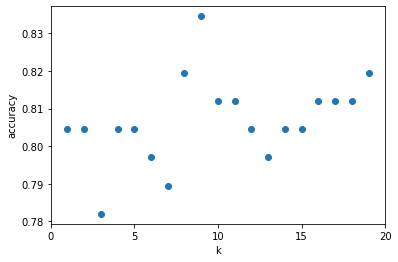

In [507]:
#Plot how sensitive is k-NN classification accuracy with different 'k' parameters, 9 seems to be the best in this case
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

# 4.2. Random Forest classifier (RFc)
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

In [547]:
from sklearn.ensemble import RandomForestClassifier

#Test with default parameters: Compared with the below combination of parameters, the reference's parameters below obtained the best accuracy (0.83)
RFclassifier_default = RandomForestClassifier()

RFclassifier_default.fit(X_train, y_train)
#y_pred_RF_default = RFclassifier_default.predict(X_test)

RandomForestClassifier()

In [549]:
y_pred = RFclassifier_default.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8345864661654135


In [512]:
#Random Forest Model with hyperparameters (look for the best fit of parameters to get better accuracy)
#Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Max number of levels in tree
max_depth = [2,4]

#Min number of samples required to split a node
min_samples_split = [2,5]

#Min number of samples required at each leaf node
min_samples_leaf = [1,2]

#Method of selecting samples for training each tree
bootstrap = [True, False]

In [513]:
#Create the param grid (Dictionary)
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [514]:
rf_Model = RandomForestClassifier()

In [515]:
####################################With GridSearchCV###########################################
from sklearn.model_selection import GridSearchCV #this methods takes a lot of time!

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = 4)

In [516]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [517]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 33}

In [518]:
print(rf_Grid.score(X_train, y_train))
print(rf_Grid.score(X_test, y_test))

0.8503787878787878
0.8421052631578947


In [519]:
####################################RandomizedSearchCV###########################################
from sklearn.model_selection import RandomizedSearchCV

rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose = 2, n_jobs = 4)

In [520]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [521]:
rf_RandomGrid.best_params_

{'n_estimators': 56,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [522]:
print(rf_RandomGrid.score(X_train, y_train))
print(rf_RandomGrid.score(X_test, y_test))

0.8598484848484849
0.8195488721804511


# 4.3. Logistic Regression/DecisionTreeClassifier/SVC(Support vector machine algorithm)/GausianNB(naïve Bayes algorithm)

In [533]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [541]:
def model(X_train,y_train):
    models=[]
    
    lr=LogisticRegression(max_iter=1000)
    lr.fit(X_train,y_train)
    models.append(lr)
    
    tree=DecisionTreeClassifier(random_state=42)
    tree.fit(X_train,y_train)
    models.append(tree)
    
    svm=SVC(kernel='rbf', gamma=0.1, C=1.0)
    svm.fit(X_train,y_train)
    models.append(svm)
    
    knn=KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train,y_train)
    models.append(knn)
    
    rfc=RandomForestClassifier()
    rfc.fit(X_train,y_train)
    models.append(rfc)
    
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    models.append(nb)
    
    return models

In [542]:
models=model(X_train,y_train)

In [543]:
train_accuracy=[]
test_accuracy=[]

for i in range(6):
    yhat=models[i].predict(X_test)
    yhat_t=models[i].predict(X_train)
    train_accuracy.append(accuracy_score(yhat_t,y_train))
    test_accuracy.append(accuracy_score(yhat,y_test))

In [544]:
Model=['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','RandomForestClassifier','GaussianNB']

In [545]:
Accuracy_score=pd.DataFrame({ 
    'Model':Model,
    'Train_Accuracy':train_accuracy,
    'Test_Accuracy':test_accuracy
})

In [546]:
Accuracy_score

Model  Train_Accuracy  Test_Accuracy
0      LogisticRegression        0.840909       0.812030
1  DecisionTreeClassifier        1.000000       0.729323
2                     SVC        0.861742       0.812030
3    KNeighborsClassifier        0.861742       0.834586
4  RandomForestClassifier        1.000000       0.834586
5              GaussianNB        0.823864       0.781955

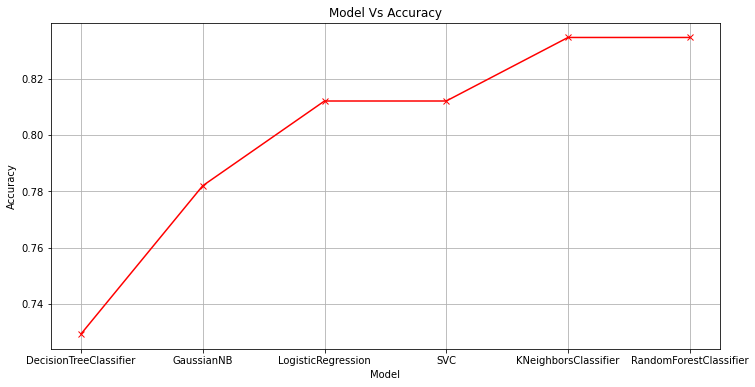

In [550]:
score=dict(zip(Model, Accuracy_score['Test_Accuracy'].values)) 
score={k: v for k, v in sorted(score.items(), key=lambda item: item[1])}

plt.figure(figsize=(12,6))
plt.plot(list(score.keys()),list(score.values()),marker='x',color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Vs Accuracy')
plt.grid()